In [20]:
#import the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.metrics import roc_auc_score

In [6]:
#reading in the dataset 
census = pd.read_csv('census_data.csv')

In [7]:
census.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [8]:
#encoding the data using Labelencoder so that it understands the numerical data as floats
le = LabelEncoder()
census_encoded = census.apply(le.fit_transform)

In [9]:
#splitting the data
x_train = census_encoded[census.flag == 'train'].drop(['flag', 'y'], axis=1)
x_test = census_encoded[census.flag == 'test'].drop(['flag', 'y'], axis=1)
y_train = census_encoded[census.flag == 'train']['y']
y_test = census_encoded[census.flag == 'test']['y']

In [10]:
#using the RandomForestClassifier
clf = RandomForestClassifier(n_estimators= 100, random_state = 0, max_features='auto')
clf.fit(x_train, y_train)
#using the model to predict the testing data
y_pred = clf.predict(x_test)

3. Building the Random Forest Model


0.7465327973794466

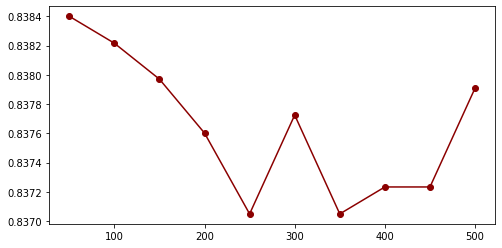

In [25]:
#creating a for loop for all of the max depth options to compare their accuracy 

results = []
no_estimate = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
for forest in no_estimate:
    model = RandomForestClassifier(n_estimators=forest, random_state= 101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    results.append(accuracy)
#plotting the results for the accuracy to compare
plt.figure(figsize=(8,4))
pd.Series(results,no_estimate).plot(color="darkred", marker="o")

#finding the area under the curve(AUC)
area_under_curve = roc_auc_score(y_test, y_pred)
area_under_curve

4. Building AdaBoost, Gradient Boost and XGB Boost Models

In [12]:
#Building AdaBoost
#using the AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators= 100, random_state= 101)
clf.fit(x_train, y_train)
#using the model to predict the testing data
y_pred = clf.predict(x_test)

0.7460076328264228

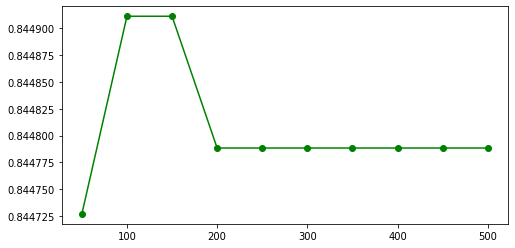

In [22]:
#using a for loop to plot the accuracy 
results = []
no_estimate = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
for adaboost in no_estimate:
    model = AdaBoostClassifier(n_estimators=adaboost, random_state= 101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    results.append(accuracy)

#plotting the results for the accuracy to compare
plt.figure(figsize=(8,4))
pd.Series(results, no_estimate).plot(color="green", marker="o")

#finding the area under the curve
area_under_curve = roc_auc_score(y_test, y_pred)
area_under_curve

In [14]:
#Building Gradient Boost(classifier)
classifier = GradientBoostingClassifier(
    max_depth = 2,
    n_estimators = 3,
    learning_rate = 1.0
)
classifier.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=3,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

0.7609339548491469

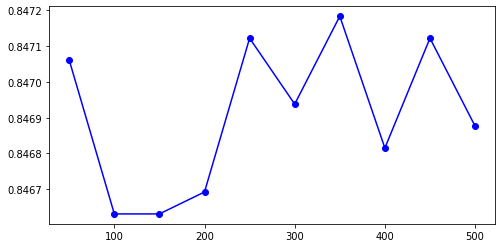

In [23]:
#using a for loop to plot the accuracy 
results = []
no_estimate = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
for gradboost in no_estimate:
    model = GradientBoostingClassifier(n_estimators=gradboost, random_state= 101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    results.append(accuracy)

#plotting the results for the accuracy to compare
plt.figure(figsize=(8,4))
pd.Series(results, no_estimate).plot(color="blue", marker="o")

#finding the area under the curve
area_under_curve = roc_auc_score(y_test, y_pred)
area_under_curve

In [16]:
#Building XGB model
!pip install xgboost

D_train = xgb.DMatrix(x_train, label=y_train)
D_test = xgb.DMatrix(x_test, label = y_test)

param = {
    'eta': 0.3,
    'max_depth': 3,
    'objective':'multi:softprob',
    'num_class': 3}
n_estimators = 20      #no of training iterations

model = xgb.train(param, D_train, n_estimators)

0.7591849222822954

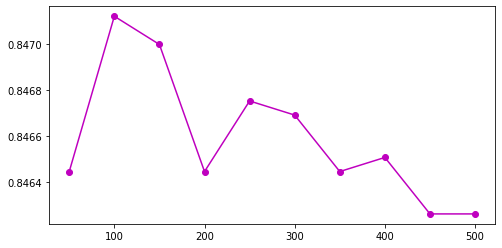

In [24]:
#using a for loop to plot the accuracy 
results = []
no_estimate = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
for xgradboost in no_estimate:
    model = XGBClassifier(n_estimators=xgradboost, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    results.append(accuracy)

#plotting the results for the accuracy to compare
plt.figure(figsize=(8,4))
pd.Series(results, no_estimate).plot(color="m",marker="o")

#finding the area under the curve
area_under_curve = roc_auc_score(y_test, y_pred)
area_under_curve

5. Compare Performance

In [32]:
#creating a new dataframe/table to show all the accuracy rates and AUC scores for each model 
perf_compare = pd.DataFrame(np.array([[.8384,.8500,.8472,.8471],[.7465,.7460, .7609,.7591]]), 
                            columns = ['Random Forest','AdaBoost','Gradient Boost','XGBoost'], 
                            index = ['Accuracy','AUC'])
perf_compare

,Random Forest,AdaBoost,Gradient Boost,XGBoost
Accuracy,0.8384,0.850,0.8472,0.8471
AUC,0.7465,0.746,0.7609,0.7591
